In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv("training_set.csv", na_values=["", "NA"], keep_default_na=False)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
m = df.isna().sum()
m[m > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:

X = df.drop(columns=["Id", "SalePrice"])
Y = df[["SalePrice"]]

In [7]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [9]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [10]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [12]:


from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer



In [13]:
num_pipe1 = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
)

In [14]:
cat_pipe1 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Not_Avail"), 
    OrdinalEncoder()
)

In [15]:
pre1 = ColumnTransformer(
    [
        ("num", num_pipe1, con),
        ("cat", cat_pipe1, cat)
    ]
).set_output(transform="pandas")

In [16]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [17]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

base_model = LinearRegression()

sel = SequentialFeatureSelector(
    base_model, n_features_to_select="auto", direction="forward", n_jobs=-1
)
sel.fit(X_pre, Y)

imp_cols = sel.get_feature_names_out()
print(imp_cols)

['num__MSSubClass' 'num__LotArea' 'num__OverallQual' 'num__OverallCond'
 'num__YearBuilt' 'num__YearRemodAdd' 'num__MasVnrArea' 'num__BsmtFinSF1'
 'num__GrLivArea' 'num__BsmtFullBath' 'num__Fireplaces' 'num__GarageCars'
 'num__WoodDeckSF' 'num__ScreenPorch' 'num__PoolArea' 'num__YrSold'
 'cat__Street' 'cat__LandContour' 'cat__Utilities' 'cat__Neighborhood'
 'cat__BldgType' 'cat__HouseStyle' 'cat__RoofStyle' 'cat__RoofMatl'
 'cat__Exterior1st' 'cat__MasVnrType' 'cat__ExterQual' 'cat__ExterCond'
 'cat__Foundation' 'cat__BsmtQual' 'cat__BsmtCond' 'cat__BsmtExposure'
 'cat__HeatingQC' 'cat__KitchenQual' 'cat__Functional' 'cat__GarageCond'
 'cat__PavedDrive' 'cat__Fence' 'cat__MiscFeature']


In [18]:

len(imp_cols)


39

In [19]:
sel_cols = [col.split("__")[1] for col in imp_cols]
sel_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [20]:

X_sel = X[sel_cols]
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,GrLivArea,BsmtFullBath,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,GarageCond,PavedDrive,Fence,MiscFeature
0,60,8450,7,5,2003,2003,196.0,706,1710,1,...,Gd,TA,No,Ex,Gd,Typ,TA,Y,NaN,NaN
1,20,9600,6,8,1976,1976,0.0,978,1262,0,...,Gd,TA,Gd,Ex,TA,Typ,TA,Y,NaN,NaN
2,60,11250,7,5,2001,2002,162.0,486,1786,1,...,Gd,TA,Mn,Ex,Gd,Typ,TA,Y,NaN,NaN
3,70,9550,7,5,1915,1970,0.0,216,1717,1,...,TA,Gd,No,Gd,Gd,Typ,TA,Y,NaN,NaN
4,60,14260,8,5,2000,2000,350.0,655,2198,1,...,Gd,TA,Av,Ex,Gd,Typ,TA,Y,NaN,NaN


In [21]:

cat_sel = list(X_sel.columns[X_sel.dtypes == "object"])
con_sel = list(X_sel.columns[X_sel.dtypes != "object"])


In [22]:
cat_sel

['Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [23]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [24]:

from sklearn.preprocessing import OneHotEncoder


In [25]:
num_pipe2 = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
)

In [26]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Not_Avail"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
)

In [27]:
pre2 = ColumnTransformer(
    [
        ("num", num_pipe2, con_sel), 
        ("cat", cat_pipe2, cat_sel)
    ]
).set_output(transform="pandas")

In [28]:

X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,...,cat__PavedDrive_P,cat__PavedDrive_Y,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not_Avail,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,0.370333,1.107810,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.482512,-0.819964,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,0.515013,1.107810,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,0.383659,1.107810,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,1.299326,1.107810,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [29]:


from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_sel_pre, Y, test_size=0.2, random_state=21
)



In [30]:

xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,...,cat__PavedDrive_P,cat__PavedDrive_Y,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not_Avail,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
710,-0.636078,-0.640101,-2.241782,0.381743,-1.201217,0.878668,-0.570750,-0.973018,-1.497169,-0.819964,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1098,-0.163109,-0.452686,-1.518467,0.381743,-1.168096,-1.689368,-0.570750,0.500854,-0.364484,-0.819964,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1286,-0.872563,-0.072844,-0.071836,-0.517200,-0.273836,-1.059473,1.925521,0.274948,-0.356870,1.107810,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
992,0.073375,-0.075851,-0.071836,2.179628,-0.240715,0.394133,1.311140,0.202570,0.638751,-0.819964,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
631,1.492282,-0.593999,1.374795,-0.517200,1.150356,1.024029,0.027027,-0.920380,0.073361,-0.819964,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


In [32]:

xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,...,cat__PavedDrive_P,cat__PavedDrive_Y,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not_Avail,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
880,-0.872563,-0.350058,-0.795151,-0.517200,1.117235,1.024029,-0.570750,1.176379,-0.809944,1.107810,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
605,0.073375,0.309002,0.651479,0.381743,-0.207594,0.248772,0.403405,0.022723,0.895747,-0.819964,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1166,-0.872563,-0.004192,1.374795,-0.517200,1.216598,1.120936,-0.172232,-0.973018,0.339875,-0.819964,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
216,-0.872563,-0.207142,0.651479,-0.517200,1.084115,0.927122,0.901552,1.101808,-0.151273,1.107810,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
970,-0.163109,0.028380,-1.518467,-1.416142,-0.737526,-1.689368,-0.570750,-0.973018,-0.615769,-0.819964,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [33]:

ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [34]:

xtrain.shape

(1168, 138)

In [35]:
xtest.shape

(292, 138)

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [37]:
model.score(xtrain, ytrain)

0.9260307600977465

In [38]:
model.score(xtest, ytest)

0.8013604243618311

In [39]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [40]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)

    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [41]:

print("Train Results : ")
evaluate_model(model, xtrain, ytrain)


Train Results : 
RMSE : 21396.03
MAE : 14536.28
MAPE : 8.73%
R2 : 92.60%


In [42]:

print("Test Results : ")
evaluate_model(model, xtest, ytest)


Test Results : 
RMSE : 36691.18
MAE : 18745.10
MAPE : 11.15%
R2 : 80.14%


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="r2", n_jobs=-1)
scores

array([-5.78510462e+20, -3.49012091e+20,  9.08557619e-01, -2.96886486e+16,
       -1.17189802e+21])

In [44]:
import numpy as np

params1 = {"alpha": np.arange(start=1, stop=100, step=1)}

In [45]:
params1

{'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

base_ridge = Ridge()

gscv_ridge = GridSearchCV(
    estimator=base_ridge, param_grid=params1, scoring="r2", cv=5, n_jobs=-1
)
gscv_ridge.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='r2')

In [47]:

gscv_ridge.best_params_

{'alpha': 13}

In [48]:
gscv_ridge.best_score_


0.8435789182556175

In [49]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=13)

In [50]:
best_ridge.score(xtrain, ytrain)

0.8823901949258921

In [51]:
best_ridge.score(xtest, ytest)

0.8323281586665334

In [52]:
params2 = {"alpha": np.arange(start=100, stop=200, step=1)}

params2

{'alpha': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
        191, 192, 193, 194, 195, 196, 197, 198, 199])}

In [53]:
from sklearn.linear_model import Lasso

base_lasso = Lasso()
gscv_lasso = GridSearchCV(
    estimator=base_lasso, param_grid=params2, scoring="r2", cv=5, n_jobs=-1
)
gscv_lasso.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])},
             scoring='r2')

In [54]:
gscv_lasso.best_params_

{'alpha': 130}

In [55]:
gscv_lasso.best_score_

0.8412606857274717

In [56]:
best_lasso = gscv_lasso.best_estimator_

In [57]:
best_lasso

Lasso(alpha=130)

In [58]:
best_lasso.score(xtrain, ytrain)

0.8806753616303331

In [59]:
best_lasso.score(xtest, ytest)

0.8355748624658316

In [60]:
def evaluate1_model(model, x, y):
    # Predicted the results
    ypred = model.predict(x)

    # Evaluate metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [61]:
print("Train Results : ")
evaluate1_model(best_ridge, xtrain, ytrain)

Train Results : 
RMSE : 26979.22
MAE : 16032.57
MAPE : 9.53%
R2 : 88.24%


In [62]:
print("Test Results : ")
evaluate1_model(best_ridge, xtest, ytest)

Test Results : 
RMSE : 33710.00
MAE : 17489.07
MAPE : 10.05%
R2 : 83.23%


In [63]:
ypred_test = best_ridge.predict(xtest)
ypred_test[0:5]

array([[168624.50099527],
       [208416.25654727],
       [240420.93706539],
       [212223.47714736],
       [ 82460.75085103]])

In [64]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [65]:
xnew = pd.read_csv("testing_set.csv")
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [66]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                  'MasVnrArea', 'BsmtFinSF1', 'GrLivArea',
                                  'BsmtFullBath', 'Fireplaces', 'GarageCars',
                                  'WoodDeckSF', 'ScreenPorch', 'PoolArea',
                                  'YrSold'])...
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'GarageCond', 'PavedDrive',
                                  'Fence', 'MiscFeature'])])

In [67]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,...,cat__PavedDrive_P,cat__PavedDrive_Y,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not_Avail,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.570750,0.053428,-1.179256,-0.819964,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.027027,1.051363,-0.354966,-0.819964,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.570750,0.761852,0.216136,-0.819964,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.460051,0.347326,0.168544,-0.819964,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.570750,-0.396190,-0.448246,-0.819964,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [68]:
xnew.shape

(1459, 80)

In [69]:
preds = best_ridge.predict(xnew_pre)
preds[0:5]

array([[110358.11908238],
       [146074.68913218],
       [165754.35593412],
       [182654.21588947],
       [192703.43810666]])

In [70]:
res = xnew[["Id"]]
res.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [71]:
res["SalePrice"] = preds.round(2)

In [72]:
res

,Id,SalePrice
0,1461,110358.12
1,1462,146074.69
2,1463,165754.36
3,1464,182654.22
4,1465,192703.44
...,...,...
1454,2915,75496.01
1455,2916,72852.34
1456,2917,168739.79
1457,2918,102181.65


<Axes: xlabel='SalePrice', ylabel='Count'>

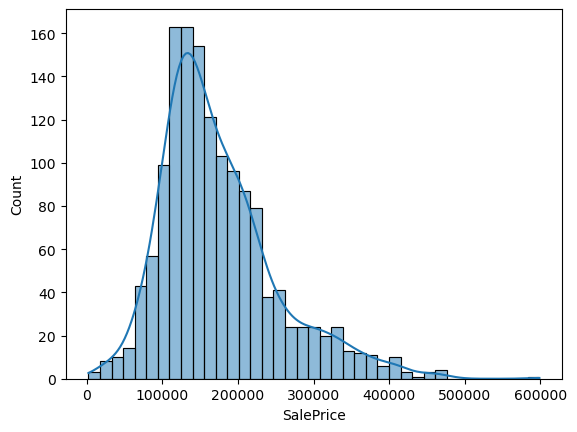

In [73]:
import seaborn as sns

sns.histplot(res["SalePrice"], kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

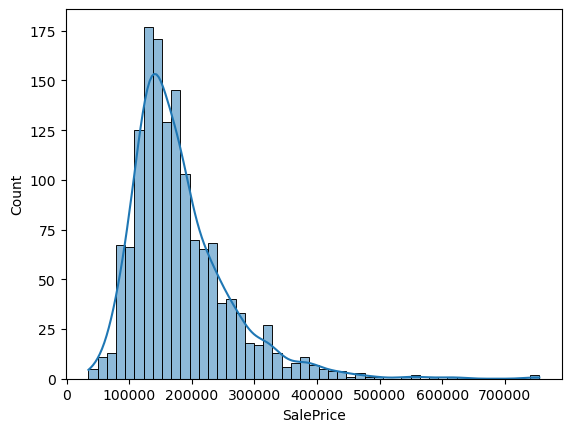

In [74]:
sns.histplot(df["SalePrice"], kde=True)

In [75]:
res.to_csv("ridge_results.csv", index=False)

In [76]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                  'MasVnrArea', 'BsmtFinSF1', 'GrLivArea',
                                  'BsmtFullBath', 'Fireplaces', 'GarageCars',
                                  'WoodDeckSF', 'ScreenPorch', 'PoolArea',
                                  'YrSold'])...
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'GarageCond', 'PavedDrive',
                                  'Fence', 'MiscFeature'])])

In [77]:
best_ridge

Ridge(alpha=13)

In [78]:
import joblib

joblib.dump(pre2, "pre.joblib")

['pre.joblib']

In [79]:
joblib.dump(best_ridge, "house_price_model.joblib")

['house_price_model.joblib']

In [80]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                  'MasVnrArea', 'BsmtFinSF1', 'GrLivArea',
                                  'BsmtFullBath', 'Fireplaces', 'GarageCars',
                                  'WoodDeckSF', 'ScreenPorch', 'PoolArea',
                                  'YrSold'])...
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'GarageCond', 'PavedDrive',
                                  'Fence', 'MiscFeature'])])

In [81]:
m = joblib.load("house_price_model.joblib")
m

Ridge(alpha=13)

In [82]:
m.score(xtest, ytest)

0.8323281586665334